In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from preprocess import PreprocessData
from plot import PlotData
from data_loader import load_data

In [2]:
plotter = PlotData()
raw_data = load_data(data_root="data")
processor = PreprocessData(raw_data=raw_data)
data = processor.get_data()

  0%|          | 0/8 [00:00<?, ?it/s]

Preprocessing dataset...


100%|██████████| 8/8 [00:01<00:00,  7.70it/s]


In [4]:
data.columns

Index(['race', 'age', 'engnat', 'gender', 'hand', 'source', 'country', 'E1',
       'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'N1', 'N2', 'N3',
       'N4', 'N5', 'N6', 'N7', 'N8', 'N9', 'N10', 'A1', 'A2', 'A3', 'A4', 'A5',
       'A6', 'A7', 'A8', 'A9', 'A10', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7',
       'C8', 'C9', 'C10', 'O1', 'O2', 'O3', 'O4', 'O5', 'O6', 'O7', 'O8', 'O9',
       'O10', 'performance', 'race_str', 'engnat_str', 'gender_str',
       'hand_str', 'source_str', 'E_score', 'N_score', 'A_score', 'C_score',
       'O_score', 'E_level', 'N_level', 'A_level', 'C_level', 'O_level',
       'age_range'],
      dtype='object')

In [6]:
data.head()

,race,age,engnat,gender,hand,source,country,E1,E2,E3,...,N_score,A_score,C_score,O_score,E_level,N_level,A_level,C_level,O_level,age_range
0,3,53,1,1,1,1,US,4,2,5,...,2.5,90.0,92.5,82.5,high,ext_low,high,ext_high,high,50-60
1,13,46,1,2,1,1,US,2,2,3,...,52.5,62.5,80.0,40.0,lower,neutral,higher,high,neutral,40-50
2,1,14,2,2,1,1,PK,5,1,1,...,90.0,70.0,97.5,87.5,higher,high,higher,ext_high,high,14-20
3,3,19,2,2,1,1,RO,2,5,2,...,82.5,67.5,40.0,77.5,lower,high,higher,neutral,high,14-20
4,11,25,2,2,1,2,US,3,1,3,...,50.0,85.0,60.0,60.0,neutral,neutral,high,neutral,neutral,20-30


In [12]:
data[data["age_range"]=="90-100"]

,race,age,engnat,gender,hand,source,country,E1,E2,E3,...,N_score,A_score,C_score,O_score,E_level,N_level,A_level,C_level,O_level,age_range
8223,4,92,1,1,3,5,IN,5,5,5,...,80.0,60.0,60.0,70.0,neutral,high,neutral,neutral,higher,90-100
8849,13,100,2,3,3,5,US,5,5,5,...,80.0,60.0,60.0,70.0,neutral,high,neutral,neutral,higher,90-100
11468,10,97,2,2,2,1,US,3,3,5,...,50.0,50.0,50.0,50.0,neutral,neutral,neutral,neutral,neutral,90-100
14145,1,99,1,3,1,1,US,3,2,4,...,62.5,87.5,85.0,97.5,higher,higher,high,high,ext_high,90-100


In [13]:
data[data["age_range"]=="80-90"]

,race,age,engnat,gender,hand,source,country,E1,E2,E3,...,N_score,A_score,C_score,O_score,E_level,N_level,A_level,C_level,O_level,age_range


In [23]:
def join_plot(data, plot, name, grid=True):
    plt.figure(figsize=(18, 8))
    if grid:
        plt.grid()
    plt.title(name, fontweight="bold")
    order = ["ext_low", "low", "lower", "neutral", "higher", "high", "ext_high"]
    plot(x="trait", y="performance", hue="level", data=joined, hue_order=order)
    plt.savefig(f"img/{name}.png")

In [21]:
joined = data.melt(id_vars=["performance"], value_vars=["E_level", "N_level", "A_level", "C_level", "O_level"], var_name="trait", value_name="level")

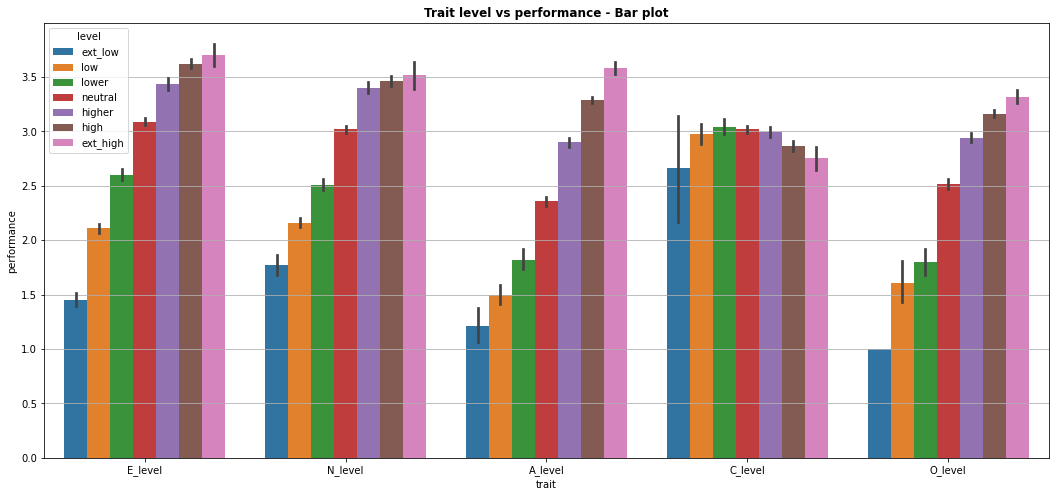

In [11]:
join_plot(data=joined, plot=sns.barplot, name="Trait level vs performance - Bar plot")

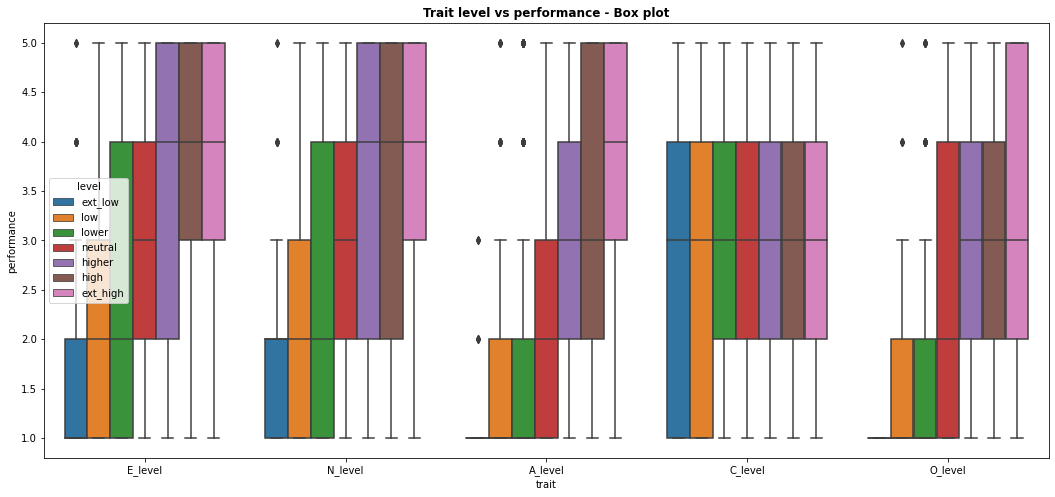

In [18]:
join_plot(data=joined, plot=sns.boxplot, name="Trait level vs performance - Box plot", grid=False)

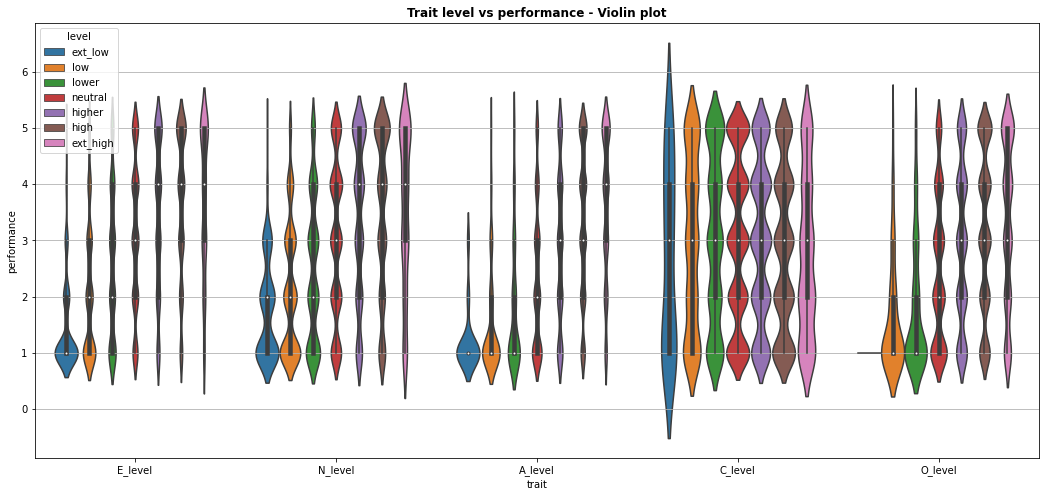

In [24]:
join_plot(data=joined, plot=sns.violinplot, name="Trait level vs performance - Violin plot")

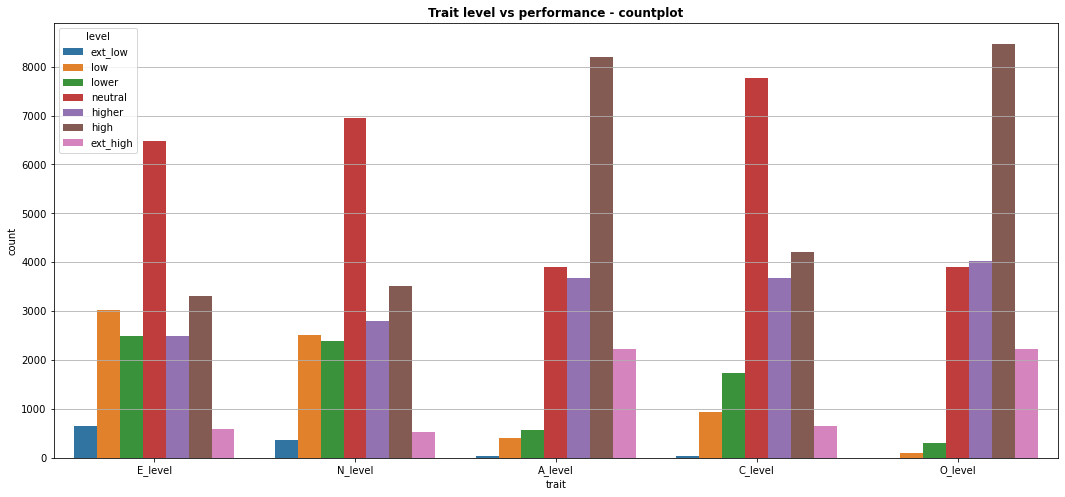

In [26]:
plt.figure(figsize=(18, 8))
plt.grid()
plt.title("Trait level vs performance - countplot", fontweight="bold")
order = ["ext_low", "low", "lower", "neutral", "higher", "high", "ext_high"]
sns.countplot(x="trait", hue="level", data=joined, hue_order=order)
plt.savefig(f"img/Trait level vs performance - countplot.png")

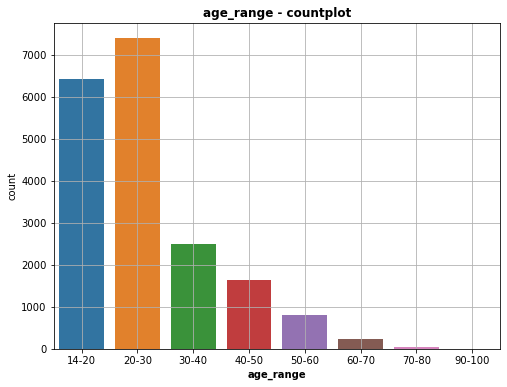

In [14]:
order = ["14-20", "20-30", "30-40", "40-50", "50-60", "60-70", "70-80", "90-100"]
plotter.plot(data=data, x="age_range", y=None, grid=True, plot=sns.countplot, order=order)

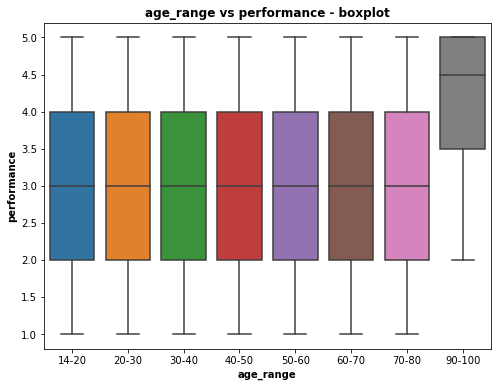

In [15]:
plotter.plot(data=data, x="age_range", y="performance", plot=sns.boxplot, order=order)

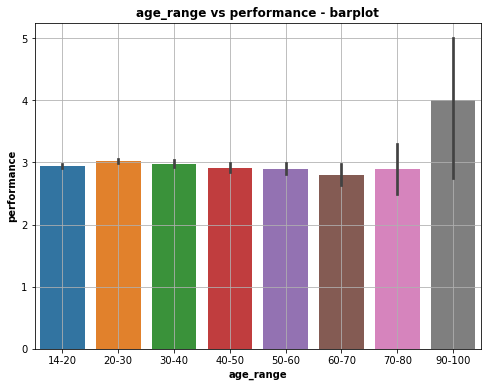

In [16]:
plotter.plot(data=data, x="age_range", y="performance", plot=sns.barplot, grid=True, order=order)

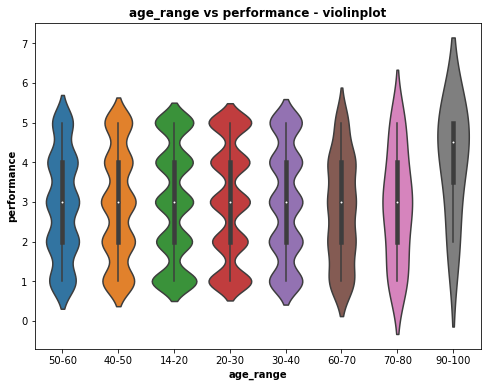

In [7]:
plotter.plot(data=data, x="age_range", y="performance", plot=sns.violinplot)

No handles with labels found to put in legend.


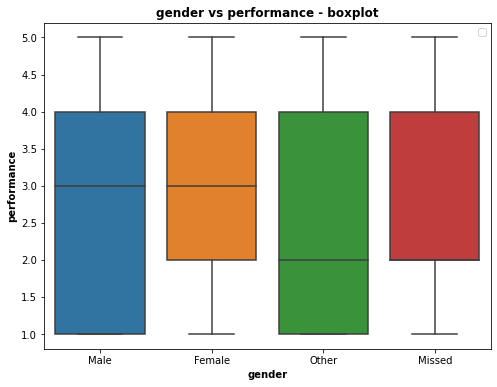

In [3]:
plotter.plot(data=data, x="gender_str", y="performance", plot=sns.boxplot)

,race,age,engnat,gender,hand,source,country,E1,E2,E3,...,race_str,engnat_str,gender_str,hand_str,source_str,E_score,N_score,A_score,C_score,O_score
0,3,53,1,1,1,1,US,4,2,5,...,European,Yes,Male,Right,Web,85.0,2.5,90.0,92.5,82.5
1,13,46,1,2,1,1,US,2,2,3,...,Other,Yes,Female,Right,Web,30.0,52.5,62.5,80.0,40.0
2,1,14,2,2,1,1,PK,5,1,1,...,Mixed,No,Female,Right,Web,62.5,90.0,70.0,97.5,87.5
3,3,19,2,2,1,1,RO,2,5,2,...,European,No,Female,Right,Web,30.0,82.5,67.5,40.0,77.5
4,11,25,2,2,1,2,US,3,1,3,...,South East Asian,No,Female,Right,Google,60.0,50.0,85.0,60.0,60.0


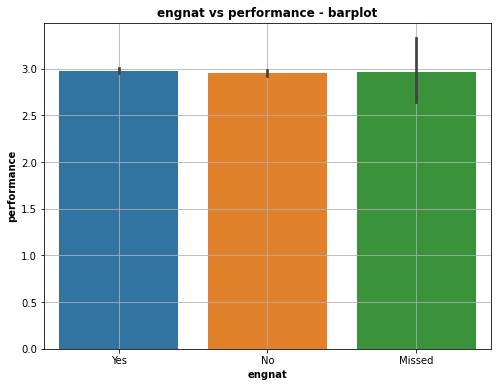

In [18]:
plotter.plot(data=data, x="engnat_str", y="performance", plot=sns.barplot, grid=True)

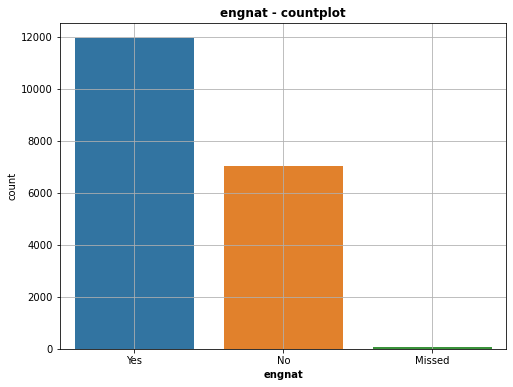

In [19]:
plotter.plot(data=data, x="engnat_str", plot=sns.countplot, grid=True)

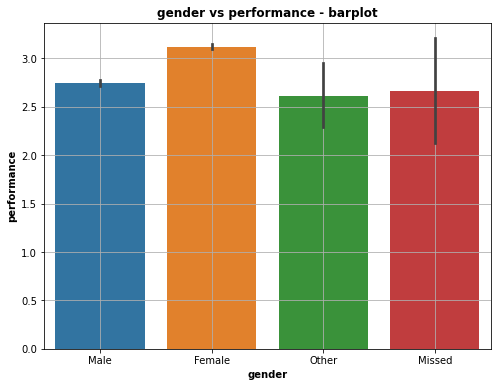

In [12]:
plotter.plot(data=data, x="gender_str", y="performance", plot=sns.barplot, grid=True)

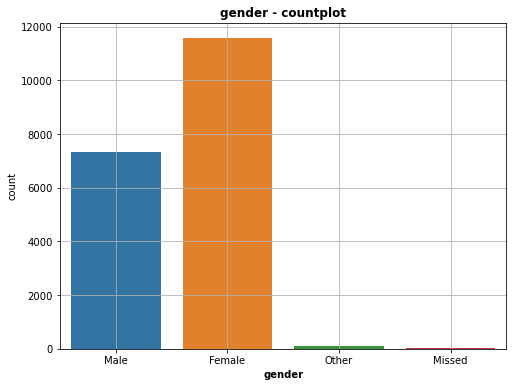

In [3]:
plotter.plot(data=data, x="gender_str", plot=sns.countplot, grid=True)

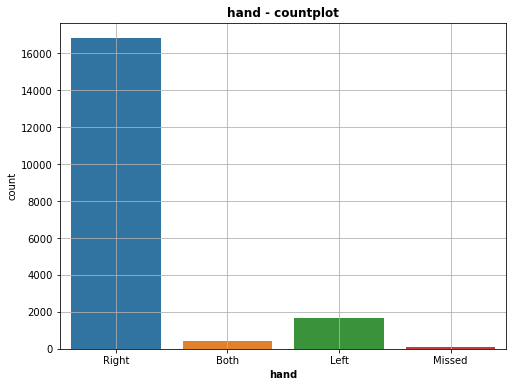

In [5]:
plotter.plot(data=data, x="hand_str", plot=sns.countplot, grid=True)

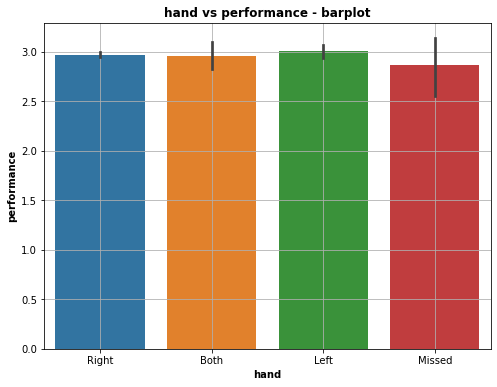

In [20]:
plotter.plot(data=data, x="hand_str", y="performance", plot=sns.barplot, grid=True)

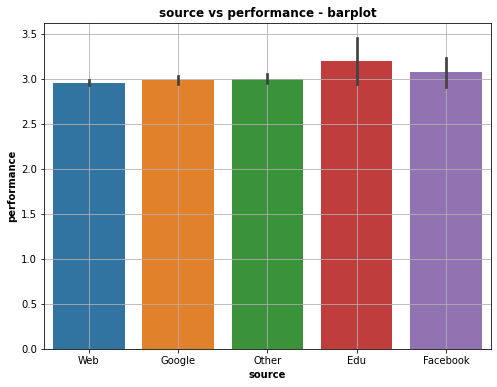

In [8]:
plotter.plot(data=data, x="source_str", y="performance", plot=sns.barplot, grid=True)

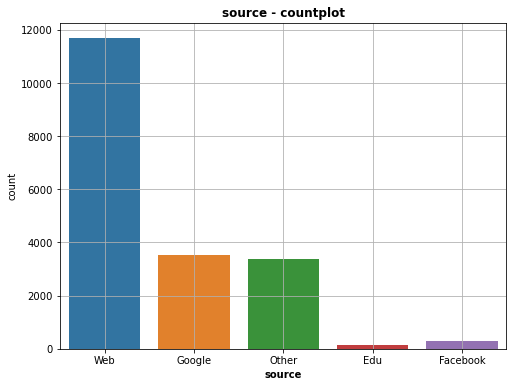

In [11]:
plotter.plot(data=data, x="source_str", y=None, plot=sns.countplot, grid=True)

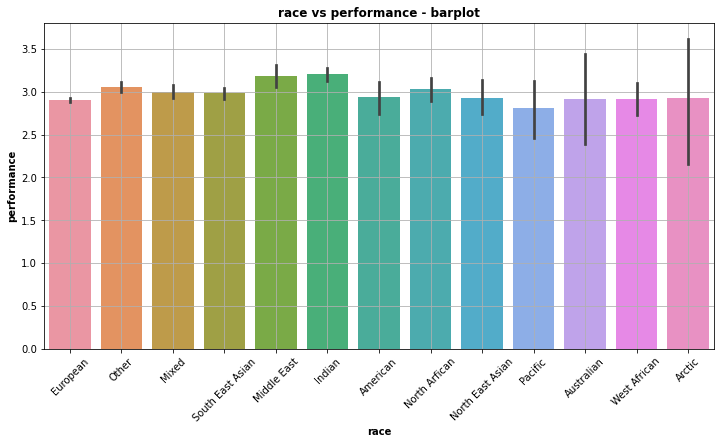

In [27]:
plotter.plot(data=data, x="race_str", y="performance", plot=sns.barplot, figsize=(12,6), grid=True, rotation=45)

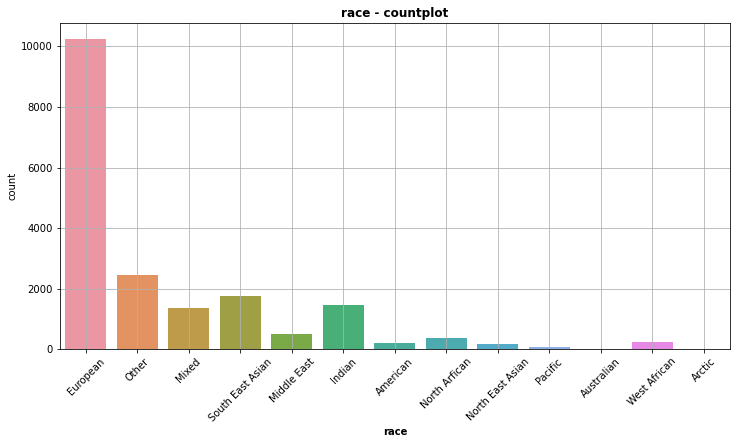

In [28]:
plotter.plot(data=data, x="race_str", plot=sns.countplot, figsize=(12,6), grid=True, rotation=45)

In [5]:
data.head()

,race,age,engnat,gender,hand,source,country,E1,E2,E3,...,E_score,N_score,A_score,C_score,O_score,E_level,N_level,A_level,C_level,O_level
0,3,53,1,1,1,1,US,4,2,5,...,85.0,2.5,90.0,92.5,82.5,high,ext_low,high,ext_high,high
1,13,46,1,2,1,1,US,2,2,3,...,30.0,52.5,62.5,80.0,40.0,lower,neutral,moderate,high,neutral
2,1,14,2,2,1,1,PK,5,1,1,...,62.5,90.0,70.0,97.5,87.5,moderate,high,moderate,ext_high,high
3,3,19,2,2,1,1,RO,2,5,2,...,30.0,82.5,67.5,40.0,77.5,lower,high,moderate,neutral,high
4,11,25,2,2,1,2,US,3,1,3,...,60.0,50.0,85.0,60.0,60.0,neutral,neutral,high,neutral,neutral


No handles with labels found to put in legend.


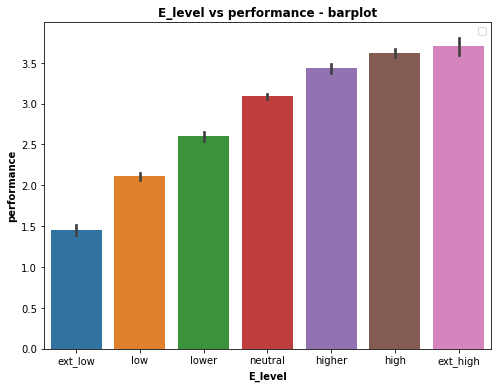

In [3]:
order = ["ext_low", "low", "lower", "neutral", "higher", "high", "ext_high"]
plotter.plot(data=data, x="E_level", y="performance", plot=sns.barplot, order=order)

No handles with labels found to put in legend.


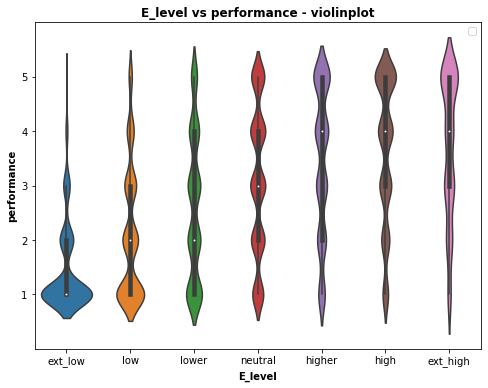

No handles with labels found to put in legend.


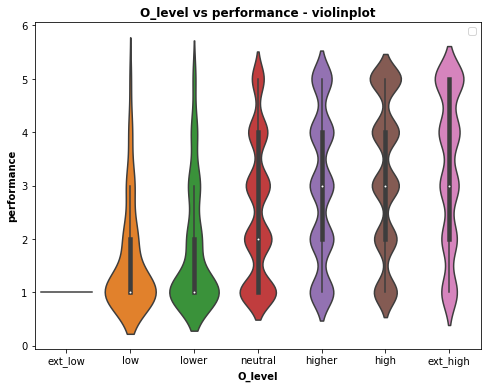

No handles with labels found to put in legend.


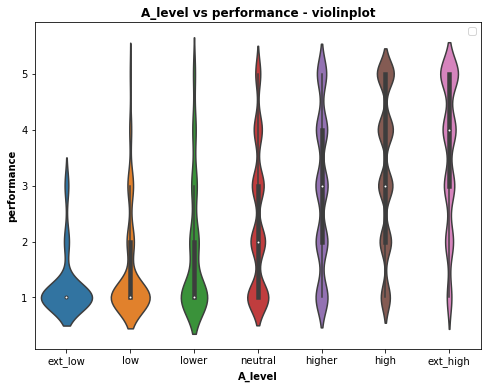

No handles with labels found to put in legend.


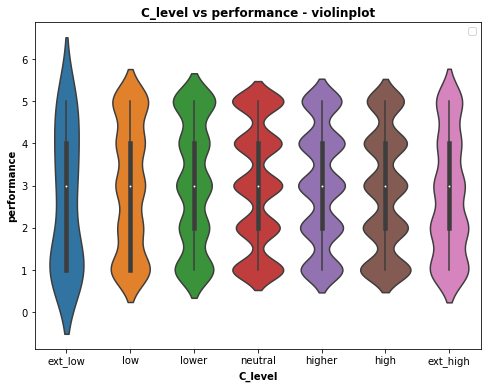

No handles with labels found to put in legend.


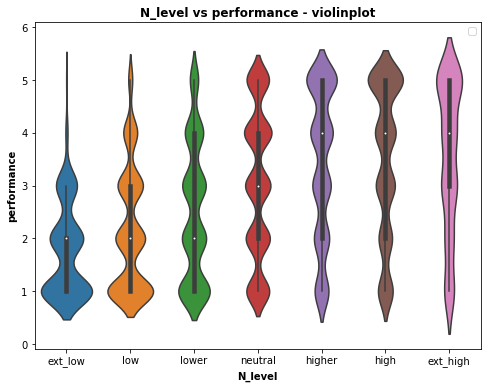

In [9]:
levels = ["E_level", "O_level", "A_level", "C_level", "N_level"]
for level in levels:
    plotter.plot(data=data, x=level, y="performance", plot=sns.violinplot, order=order, grid=True)

No handles with labels found to put in legend.


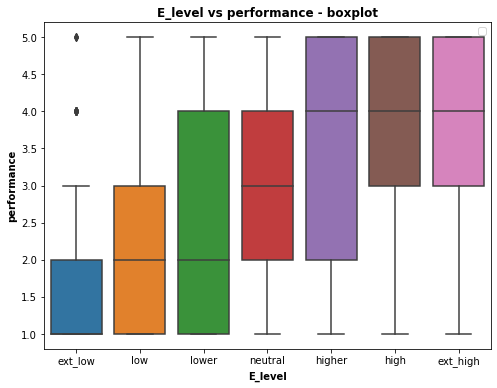

No handles with labels found to put in legend.


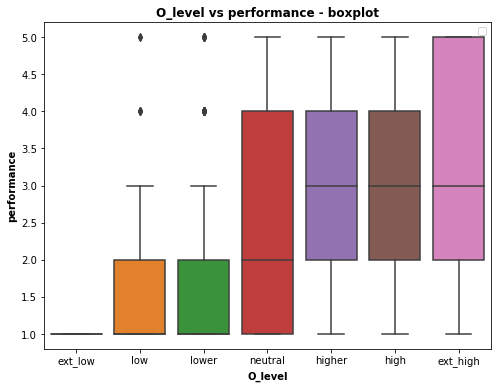

No handles with labels found to put in legend.


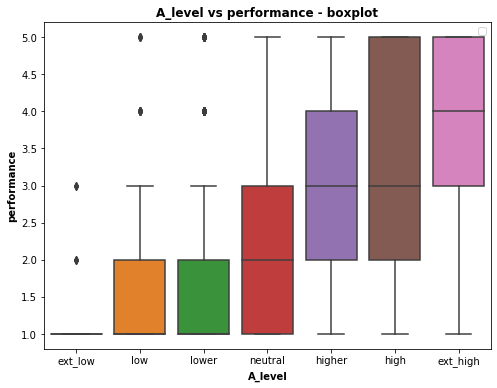

No handles with labels found to put in legend.


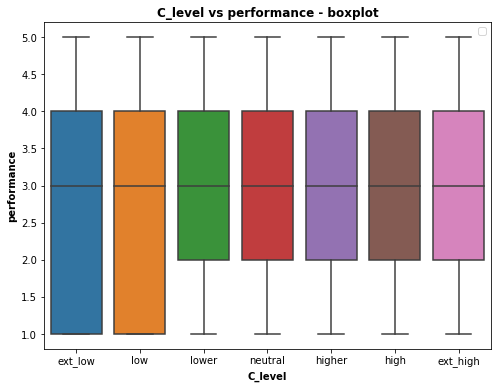

No handles with labels found to put in legend.


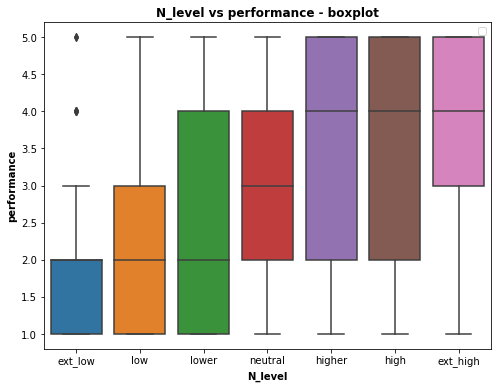

In [10]:
levels = ["E_level", "O_level", "A_level", "C_level", "N_level"]
for level in levels:
    plotter.plot(data=data, x=level, y="performance", plot=sns.boxplot, order=order)